In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

### Part A

In [ ]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

**LOAD DATA**

In [2]:
from google.colab import drive 
drive.mount('/content/drive')
path = '/content/drive/MyDrive/machine_learning/CE802_P3_Data.csv'

Mounted at /content/drive


In [3]:
# Read csv file
df = pd.read_csv(path) 

**DATA EXPLORATION**

In [ ]:
# Check the shape of the data set
print("Shape of the DataFrame:", df.shape) 

In [ ]:
# Check the number for missing values
missing_values = df.isnull().sum() 
print (missing_values)

In [ ]:
# Check the duplicate rows and remove the missing rows

duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

if duplicate_rows.sum() > 0:
  # Drop duplicate rows from the DataFrame
  df = df.drop_duplicates()

  # Check the shape of the DataFrame after dropping duplicates
  print("Shape of DataFrame after dropping duplicates:", df.shape)

In [ ]:
# Check the data type
print(df.dtypes)

In [ ]:
# Identify the categorical columns to encode
cat_cols = ['F4', 'F9']

# Create an instance of the ordinal encoder
oe = OrdinalEncoder()

# Fit the encoder on the categorical columns
oe.fit(df[cat_cols])

# Transform the categorical columns to ordinal encoding
df[cat_cols] = oe.transform(df[cat_cols])

# Print the encoded DataFrame
print(df.head(5))

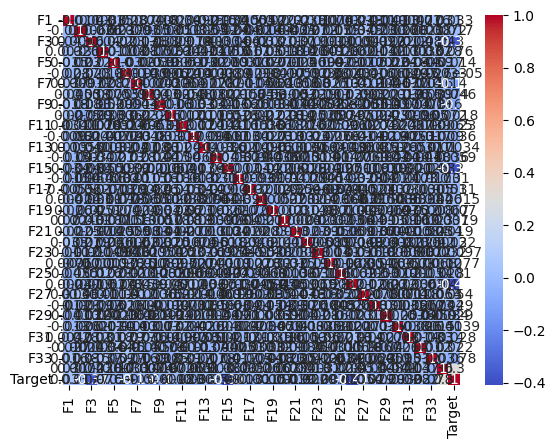

In [9]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [10]:
# Create X and y variable
X = df.drop(["Target"], axis=1)
y = df["Target"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1120, 34)
Shape of y_train: (1120,)
Shape of X_test: (280, 34)
Shape of y_test: (280,)


**LINEAR REGRESSION**

In [12]:
# Create a Linear Regression Model
lin_reg = LinearRegression()

# Train the model on the training set
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Linear Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

Linear Regression:
MSE: 19487.11029058464
RMSE: 139.59624024516074
R2: 0.5418827631717102


**RANDOM FOREST REGRESSION**

In [13]:
# Create a Random Forest Regression Model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Random Forest Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)


Random Forest Regression:
MSE: 16621.627881263823
RMSE: 128.92489240353788
R2: 0.6092466187646239


**GRADIENT BOOSTING REGRESSION**

In [14]:
# Create a Gradient Boosting Regression Model
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training set
gb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_reg.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Gradient Boosting Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

Gradient Boosting Regression:
MSE: 9850.043662430722
RMSE: 99.24738617430044
R2: 0.7684379716652494


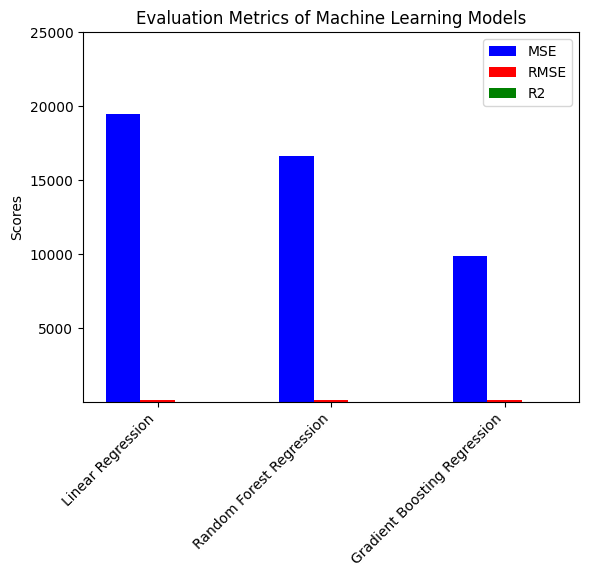

In [15]:
# Plot chat to visualize the results

# Define the data
models = ['Linear Regression', 'Random Forest Regression', 'Gradient Boosting Regression']
MSE = [19487.11, 16621.63, 9850.04]
RMSE = [139.60, 128.92, 99.25]
R2 = [0.54, 0.61, 0.77]


# Set the width of the bars
barWidth = 0.2

# Set the x-axis values
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Create the bars
plt.bar(r1, MSE, color='blue', width=barWidth, label='MSE')
plt.bar(r2, RMSE, color='red', width=barWidth, label='RMSE')
plt.bar(r3, R2, color='green', width=barWidth, label='R2')

# Set the y-axis limits
plt.ylim([0.05, 25000])

# Set the x-axis labels
plt.xticks([r + barWidth for r in range(len(models))], models, rotation=45, ha='right')

# Set the y-axis label and title
plt.ylabel('Scores')
plt.title('Evaluation Metrics of Machine Learning Models')

# Add a legend
plt.legend()

# Display the histogram
plt.show()

### Part B

In [16]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

from google.colab import drive 
drive.mount('/content/drive')
test_path = '/content/drive/MyDrive/machine_learning/CE802_P3_Test.csv'

# Load the test data
test_df = pd.read_csv('/content/drive/MyDrive/machine_learning/CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'F4' column
test_data['F4'] = le.fit_transform(test_data['F4'])

# Encode the 'F9' column
test_data['F9'] = le.fit_transform(test_data['F9'])


predicted = model.predict(test_data)

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('/content/drive/MyDrive/machine_learning/CE802_P3_Test.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('/content/drive/MyDrive/machine_learning/CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('/content/drive/MyDrive/machine_learning/CE802_P3_Test.csv').iloc[:,:-1])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
